In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [2]:
data=pd.read_csv("C:/Users/omkar/Downloads/Admission_Predict_Ver1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Classlabel
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,1
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,1


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Classlabel         500 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 35.3 KB


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Classlabel
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.926000
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.262033
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,1.000000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,1.000000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Classlabel           0
dtype: int64

In [6]:
print("There are {} rows and {}columns.".format(data.shape[0],data.shape[1]))

There are 500 rows and 9columns.


In [7]:
data= data.drop(['Serial No.'], axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Classlabel
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Classlabel         500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [9]:
data['Classlabel'].value_counts()

1    463
0     37
Name: Classlabel, dtype: int64

In [10]:
data['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [11]:
print(data.Classlabel== 1)

0      True
1      True
2      True
3      True
4      True
       ... 
495    True
496    True
497    True
498    True
499    True
Name: Classlabel, Length: 500, dtype: bool


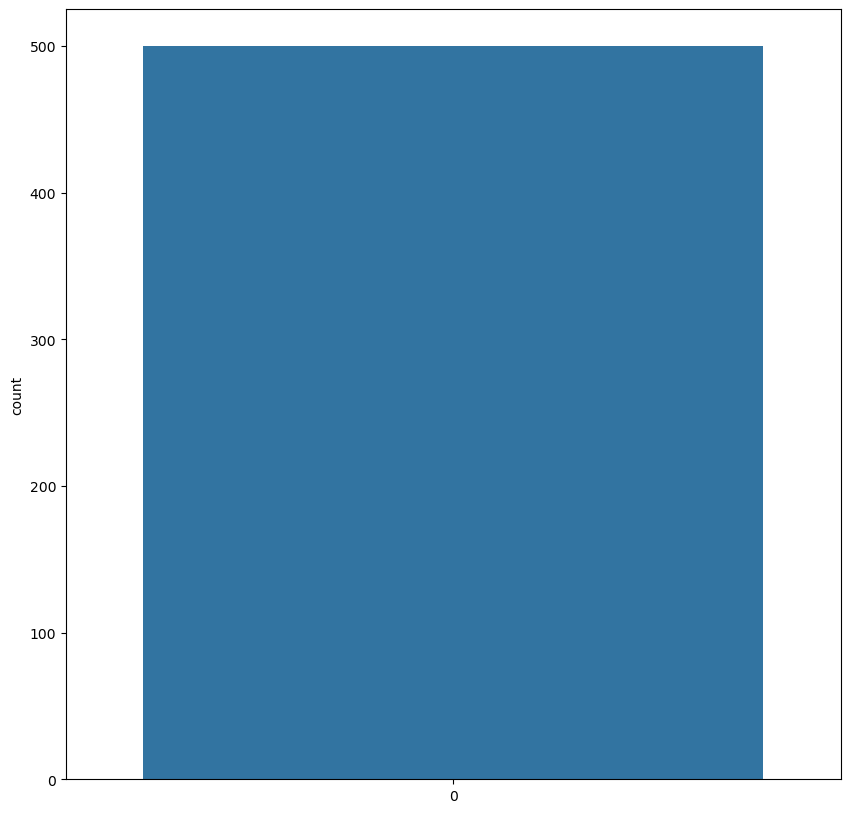

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv("C:\\Users\\omkar\\Downloads\\Admission_Predict_Ver1.csv")

# Set the figure size before creating the plot
plt.figure(figsize=(10, 10))

# Create a count plot using Seaborn
sns.countplot(data['SOP'].values)

# Show the plot
plt.show()


In [13]:
#split dataset in features and target variable
feature_cols = ['GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research']
X = data[feature_cols] # Features
y = data.Classlabel # Target variable

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=1) # 70% training and 30% test

In [15]:
len(X_train)

350

In [16]:
len(X_test)

150

In [17]:
# Create Decision Tree classifer object
dtclf = DecisionTreeClassifier()

# Fit Decision Tree Classifer
dtclf = dtclf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtclf.predict(X_test)

print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1]


In [18]:
# Model Accuracy, how often is the classifier correct?
accuracy=metrics.accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 90.00


In [19]:
metrics.confusion_matrix(y_pred,y_test)

array([[  6,   7],
       [  8, 129]], dtype=int64)

In [20]:
#pip install graphviz

In [21]:
#pip install pydotplus

[Text(0.4791666666666667, 0.9583333333333334, 'x[4] <= 7.665\ngini = 0.123\nsamples = 350\nvalue = [23, 327]'),
 Text(0.2833333333333333, 0.875, 'x[0] <= 300.0\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(0.16666666666666666, 0.7916666666666666, 'x[4] <= 7.645\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.1, 0.7083333333333334, 'x[3] <= 1.75\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.06666666666666667, 0.625, 'x[0] <= 296.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.03333333333333333, 0.5416666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.1, 0.5416666666666666, 'x[4] <= 7.48\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.06666666666666667, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.13333333333333333, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13333333333333333, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.23333333333333334, 0.7083333333333334, 'x[3] <

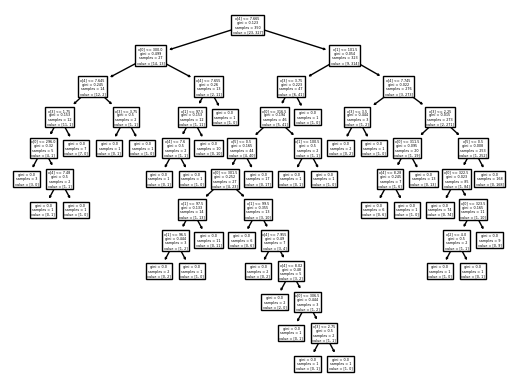

In [22]:
from sklearn import tree
tree.plot_tree(dtclf)